# Topic 7 - Feature Selection, Model Selection, Model Tuning
In this notebook we will introduce a few additional aspects of machine learning.
- Decision Tree
- Hyperparameter Tuning
- Model Selection

You are a Data Scientist for an insurance company. The policy maker of the company wants to enable and establish a new viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, the company sells 5 types of insurance - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased one of these.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product line to support their health insurance business i.e. Wellness Tourism Packages. Wellness Tourism is defined as travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. The hope is that this would encourage customers to make healthy lifestyle choices and reduce insurance claims.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist have to analyze the customers' data and information to provide recommendations to the policy maker and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## 1. Understanding our data

- CustomerID: Unique customer ID
- **ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes) target**
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- DurationOfPitch: Duration of the pitch by a salesperson to the customer
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- ProductPitched: Product pitched by the salesperson
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- PitchSatisfactionScore: Sales pitch satisfaction score
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

## 2. Import libraries

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values, and scale values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Libraries to import decision tree classifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import StackingClassifier

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

## 3. Open and view the data

In [ ]:
#Loading the dataset - sheet_name parameter is used if there are Basicple tabs in the excel file.
data=pd.read_excel("Tourism.xlsx", sheet_name='Tourism')
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

### Insights
- There are total 20 columns and 4,888 observations in the dataset
- We can see that 8 columns have less than 4,888 non-null values i.e. columns have missing values.

In [ ]:
pd.DataFrame(data={'% of Missing Values':round(data.isna().sum()/data.isna().count()*100,2)})

,% of Missing Values
CustomerID,0.00
ProdTaken,0.00
Age,4.62
TypeofContact,0.51
CityTier,0.00
DurationOfPitch,5.14
Occupation,0.00
Gender,0.00
NumberOfPersonVisited,0.00
NumberOfFollowups,0.92


### Insights
- `Age` column has 4.62% missing values out of the total observations.
- `TypeofContact` column has 0.51% missing values out of the total observations.
- `DurationOfPitch` column has 5.14% missing values out of the total observations.
- `NumberOfFollowups` column has 0.92% missing values out of the total observations.
- `PreferredPropertyStar` column has 0.53% missing values out of the total observations.
- `NumberOfTrips` column has 2.86% missing values out of the total observations.
- `NumberOfChildrenVisiting` column has 1.35% missing values out of the total observations.
- `MonthlyIncome` column has 4.77% missing values out of the total observations.
- We will impute these values after we split the data into train and test sets.

In [ ]:
data.nunique()

CustomerID                 4888
ProdTaken                     2
Age                          44
TypeofContact                 2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

### Insights
- We can drop the column - CustomerID as it is unique for each customer and will not add value to the model.
- Most of the variables are categorical except - Age, duration of pitch, monthly income  and number of trips of customers.

In [ ]:
#Dropping CustomerID column
data.drop(columns='CustomerID',inplace=True)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


### Insights
- Mean and median of age column are very close to each other i.e. approx 37 and 36 respectively.
- Duration of pitch has some outliers at the right end as 75th percentile value is 20 and max value is 127. We need to explore this further.
- It seems like monthly income has some outliers at both ends. We need to explore this further.
- Number of trips also has some outliers as 75th percentile value is 4 and max value is 22.
- We can see that the target variable - ProdTaken is imbalanced as most of the values are 0.

In [ ]:
#Making a list of all catrgorical variables
cat_col=['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Passport', 'OwnCar', 'Designation']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print('-'*50)

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
--------------------------------------------------
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
--------------------------------------------------
0    3466
1    1422
Name: Passport, dtype: int64
--------------------------------------------------
1    3032
0    1856
Name: OwnCar, dtype: int64
--------------------------------------------------
Executive         184

### Insights
- Free lancer category in occupation column has just 2 entries out of 4,888 observations.
- We can see that Gender has 3 unique values which includes - 'Fe Male' and 'Female'. This must be a data input error, we should replace 'Fe Male' with 'Female'.
- NumberOfPersonVisiting equal to 5 has count equal to 3 only.
- Majority of the customers are married.
- Majority of the customers owns a car.

In [ ]:
#Replacing 'Fe Male' with 'Female'
data.Gender=data.Gender.replace('Fe Male', 'Female')

In [ ]:
#Converting the data type of each categorical variable to 'category'
for column in cat_col:
    data[column]=data[column].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ProdTaken                4888 non-null   int64   
 1   Age                      4662 non-null   float64 
 2   TypeofContact            4863 non-null   category
 3   CityTier                 4888 non-null   int64   
 4   DurationOfPitch          4637 non-null   float64 
 5   Occupation               4888 non-null   category
 6   Gender                   4888 non-null   category
 7   NumberOfPersonVisited    4888 non-null   int64   
 8   NumberOfFollowups        4843 non-null   float64 
 9   ProductPitched           4888 non-null   category
 10  PreferredPropertyStar    4862 non-null   float64 
 11  MaritalStatus            4888 non-null   category
 12  NumberOfTrips            4748 non-null   float64 
 13  Passport                 4888 non-null   category
 14  PitchSat

## 4. Exploratory Data Analysis
- We will skip this part for now, but it is a vital part of your analysis and should never be skipped when outside of a classroom setting.

## 4b. Outliers
- I am showing only those with possible outliers, this would not be known and you would be responsible for determining where there are outliers on your own.

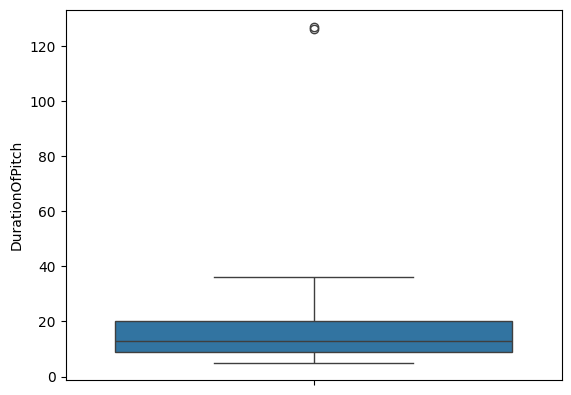

In [ ]:
sns.boxplot(data['DurationOfPitch']);

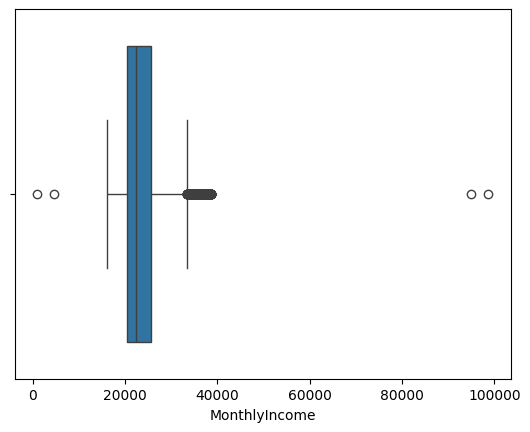

In [ ]:
sns.boxplot(data['MonthlyIncome'], orient = 'h');

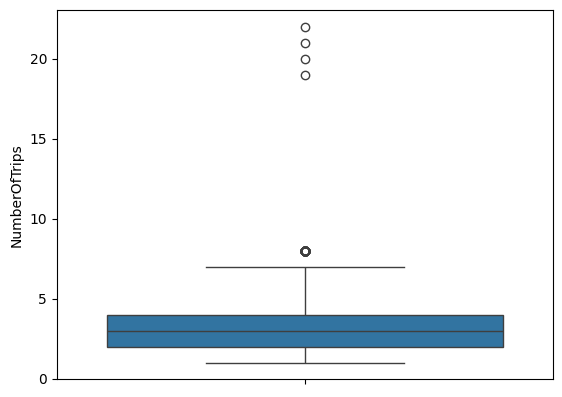

In [ ]:
sns.boxplot(data['NumberOfTrips']);

In [ ]:
#Dropping observaions with duration of pitch greater than 40. There are just 2 such observations
data.drop(index=data[data.DurationOfPitch>37].index,inplace=True)

#Dropping observation with monthly income less than 12000 or greater than 40000. There are just 4 such observations
data.drop(index=data[(data.MonthlyIncome>40000) | (data.MonthlyIncome<12000)].index,inplace=True)

#Dropping observations with number of trips greater than 8. There are just 4 such observations
data.drop(index=data[data.NumberOfTrips>10].index,inplace=True)

### 5. Feature Engineering
It is possible that we may want to create new features from our data. This is an entirely subjective process. For example, maybe we want to know how many adults are planning on traveling. We know the number of children and we know the total number so we can create a new feature as the total - children and we will have the number of adults (or non-children) traveling. This new feature may provide additional information or it may be meaningless, we don't know yet. Another possible feature may be one for those who in their late careers (ie. > 50). We can also create this feature to see if we gain any additional insights.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4878 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ProdTaken                4878 non-null   int64   
 1   Age                      4653 non-null   float64 
 2   TypeofContact            4853 non-null   category
 3   CityTier                 4878 non-null   int64   
 4   DurationOfPitch          4627 non-null   float64 
 5   Occupation               4878 non-null   category
 6   Gender                   4878 non-null   category
 7   NumberOfPersonVisited    4878 non-null   int64   
 8   NumberOfFollowups        4833 non-null   float64 
 9   ProductPitched           4878 non-null   category
 10  PreferredPropertyStar    4853 non-null   float64 
 11  MaritalStatus            4878 non-null   category
 12  NumberOfTrips            4738 non-null   float64 
 13  Passport                 4878 non-null   category
 14  PitchSat

In [ ]:
data['adults'] = data['NumberOfPersonVisited'] - data['NumberOfChildrenVisited']
data['late_career'] = np.where(data['Age'] > 50, 1, 0)
data.sample(10)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome,adults,late_career
1442,1,29.0,Self Enquiry,1,NaN,Small Business,Male,2,3.0,Basic,...,Married,1.0,1,3,1,0.0,Executive,19787.0,2.0,0
3004,0,35.0,Self Enquiry,1,15.0,Salaried,Female,3,4.0,Deluxe,...,Married,5.0,0,5,1,1.0,Manager,23799.0,2.0,0
2271,1,50.0,Company Invited,3,NaN,Salaried,Male,2,3.0,Deluxe,...,Single,4.0,1,1,1,1.0,Manager,19728.0,1.0,0
2222,1,36.0,Self Enquiry,1,22.0,Salaried,Female,2,1.0,Basic,...,Single,2.0,0,1,1,0.0,Executive,17743.0,2.0,0
1345,0,35.0,Self Enquiry,1,NaN,Salaried,Female,2,4.0,Deluxe,...,Married,1.0,1,1,1,1.0,Manager,19788.0,1.0,0
3168,0,25.0,Self Enquiry,1,24.0,Small Business,Female,3,5.0,Deluxe,...,Married,3.0,0,3,1,2.0,Manager,23055.0,1.0,0
4120,0,23.0,Self Enquiry,1,12.0,Salaried,Male,3,2.0,Basic,...,Married,3.0,1,4,1,1.0,Executive,21006.0,2.0,0
2499,0,34.0,Company Invited,1,7.0,Salaried,Female,4,4.0,Standard,...,Single,3.0,1,2,1,1.0,Senior Manager,32136.0,3.0,0
1948,0,25.0,Self Enquiry,3,19.0,Small Business,Male,2,3.0,Basic,...,Married,2.0,0,3,1,1.0,Executive,17096.0,1.0,0
996,0,27.0,Self Enquiry,3,16.0,Small Business,Female,3,4.0,Deluxe,...,Divorced,2.0,1,3,1,2.0,Manager,20769.0,1.0,0


## 6. Prepare data for modeling

In [ ]:
#Separating target variable and other variables
X=data.drop(columns='ProdTaken')
y=data['ProdTaken']

As our aim is to predict customers who are more likely to buy the product, we should drop columns `DurationOfPitch','NumberOfFollowups','ProductPitched','PitchSatisfactionScore'` as these columns would not be available at the time of prediction for new data.

In [ ]:
#Dropping columns
X.drop(columns=['DurationOfPitch','NumberOfFollowups','ProductPitched','PitchSatisfactionScore'],inplace=True)

What does it mean to stratify our train_test_split code by y? When we have an imbalanced dataset (ie. our target variable outcomes may not be anywhere close to a 50/50 split) we might end up with very few specific outcomes in our training/testing data based on a random split.

For example, lets say we are trying to detect fraud. Fraud is not very common. Maybe we have a dataset that has 1000 observations and only 10 are fraud. It is possible that when we do a train_test_split on our data that all of the actual cases of fraud end up in the training data. When we statify by y (our target variable), we are ensuring that we have an appropriate split of fraud observations in the training and testing data. In this case, stratify y should ensure that our training and testing samples each contain a 100:1 ratio of not-fraud:fraud.

In [ ]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1,stratify=y)

As we saw earlier, our data has missing values. We will impute missing values using median for continuous variables and mode for categorical variables. We will use `SimpleImputer` to do this.

The `SimpleImputer` provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located.

In [ ]:
si1=SimpleImputer(strategy='median')

median_imputed_col=['Age','MonthlyIncome','NumberOfTrips']

#Fit and transform the train data
X_train[median_imputed_col]=si1.fit_transform(X_train[median_imputed_col])

#Transform the test data i.e. replace missing values with the median calculated using training data
X_test[median_imputed_col]=si1.transform(X_test[median_imputed_col])

In [ ]:
si2=SimpleImputer(strategy='most_frequent')

mode_imputed_col=['TypeofContact','PreferredPropertyStar','NumberOfChildrenVisited']

#Fit and transform the train data
X_train[mode_imputed_col]=si2.fit_transform(X_train[mode_imputed_col])

#Transform the test data i.e. replace missing values with the mode calculated using training data
X_test[mode_imputed_col]=si2.transform(X_test[mode_imputed_col])

In [ ]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Age                         0
TypeofContact               0
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisited       0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
OwnCar                      0
NumberOfChildrenVisited     0
Designation                 0
MonthlyIncome               0
adults                     50
late_career                 0
dtype: int64
------------------------------
Age                         0
TypeofContact               0
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisited       0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
OwnCar                      0
NumberOfChildrenVisited     0
Designation                 0
MonthlyIncome               0
adults                     16
late_career               

In [ ]:
#Fill in the missing adults variable now that we have filled in children
X_train['adults'] = X_train['NumberOfPersonVisited'] - X_train['NumberOfChildrenVisited']
X_test['adults'] = X_test['NumberOfPersonVisited'] - X_test['NumberOfChildrenVisited']

In [ ]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Age                        0
TypeofContact              0
CityTier                   0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
adults                     0
late_career                0
dtype: int64
------------------------------
Age                        0
TypeofContact              0
CityTier                   0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
adults                     0
late_career                0
dtype: int64


In [ ]:
#List of columns to create a dummy variables
col_dummy=['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus', 'Designation', 'CityTier']

In [ ]:
#Encoding categorical varaibles - Category Encoders package
X_train=pd.get_dummies(X_train, columns=col_dummy, drop_first=True)
X_test=pd.get_dummies(X_test, columns=col_dummy, drop_first=True)

In [ ]:
X_train

,Age,NumberOfPersonVisited,PreferredPropertyStar,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisited,MonthlyIncome,adults,late_career,...,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,CityTier_2,CityTier_3
2278,29.0,3,3.0,5.0,0,1,0.0,17514.0,3.0,0,...,0,1,0,0,1,0,0,0,0,0
1706,33.0,2,5.0,1.0,0,1,1.0,17707.0,1.0,0,...,0,1,0,0,1,0,0,0,0,0
1807,36.0,1,3.0,1.0,0,1,0.0,22275.0,1.0,0,...,1,0,1,0,1,0,0,0,0,0
2267,26.0,2,3.0,2.0,0,1,0.0,17377.0,2.0,0,...,1,1,0,0,1,0,0,0,0,0
1248,36.0,3,3.0,2.0,0,1,2.0,18445.0,1.0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522,38.0,2,3.0,6.0,0,0,1.0,32342.0,1.0,0,...,1,0,1,0,0,0,1,0,0,0
931,30.0,3,3.0,1.0,1,1,2.0,19695.0,1.0,0,...,0,0,1,0,0,1,0,0,0,0
820,35.0,2,3.0,2.0,0,0,0.0,19968.0,2.0,0,...,1,1,0,0,0,1,0,0,0,1
2421,41.0,2,3.0,1.0,0,1,1.0,21151.0,1.0,0,...,1,1,0,0,0,0,0,0,0,1


## 7. Building the base model
We will focus on building a decision tree here. A decision tree is a flowchart-like structure that has many rules associated with it. Each branch represents the binary outcome from each test.

![decisiontree.png](attachment:decisiontree.png)

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Training Accuracy: 1.0
Testing Accuracy: 0.8510928961748634


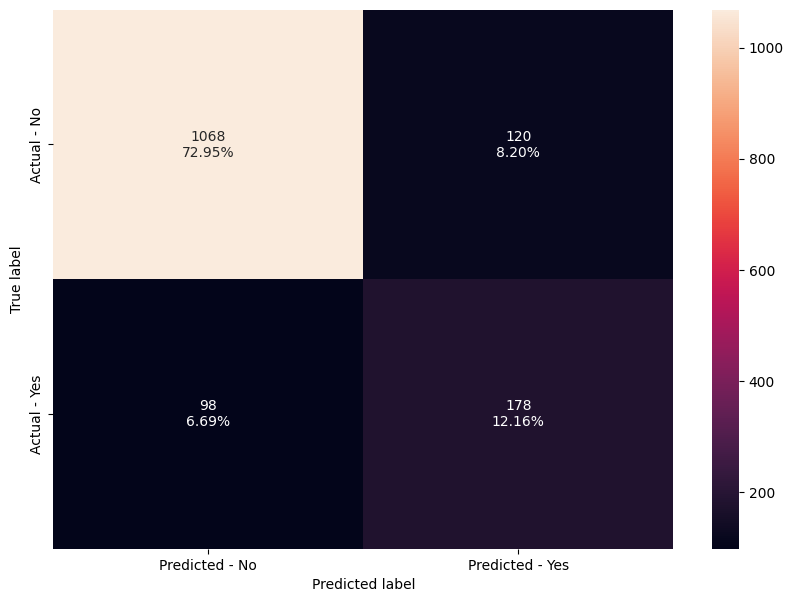

In [ ]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating model accuracy
print('Training Accuracy:', d_tree.score(X_train, y_train))
print('Testing Accuracy:', d_tree.score(X_test, y_test))

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

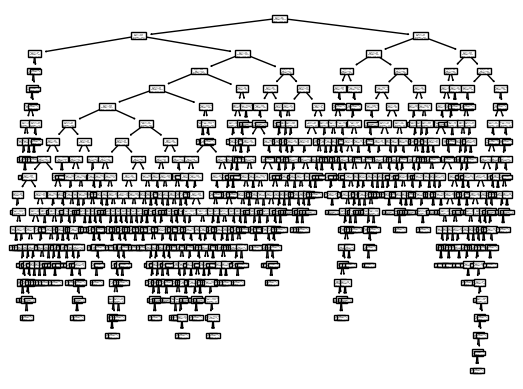

In [ ]:
tree.plot_tree(d_tree);

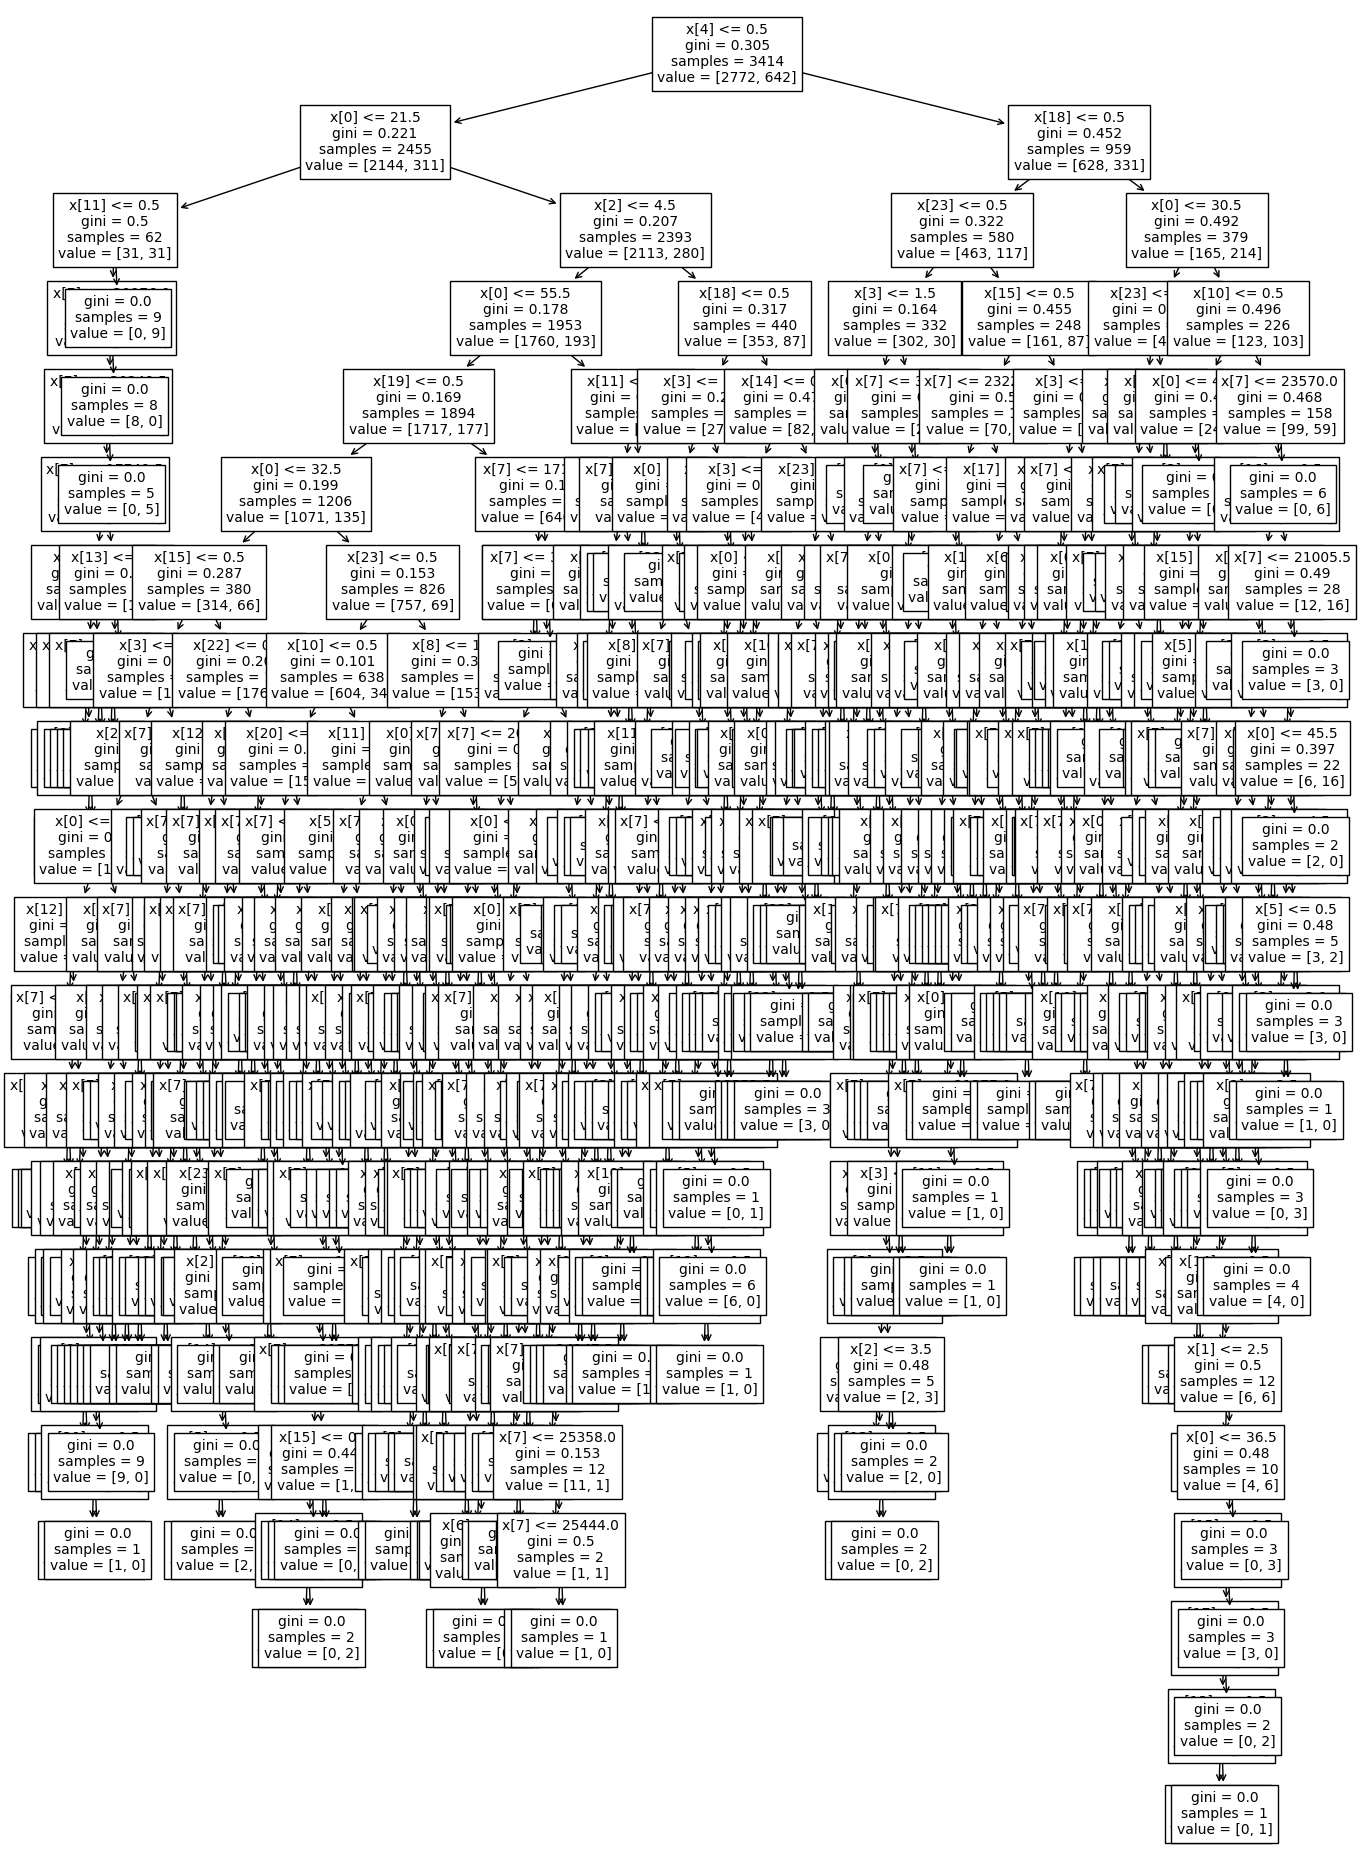

In [ ]:
plt.figure(figsize=(16,24))  # set plot size (denoted in inches)
tree.plot_tree(d_tree, fontsize=10)
plt.show()

### Insights
Notice that during training we obtained accuracy of 100% (ie. perfect). However, during our testing performance we only have accuracy of 85%. This is due to our model overfitting during the training portion and it is very common with decision trees. What is happening is that we are fitting our model to the exact data in the training dataset. The problem is that the testing data is not identical to the training data and this results in poor generalization to out-of-sample data.

We can combat this problem while also potentially improving the performance of our model through what is known as hyperparameter tuning. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
#Choose the type of classifier.
d_tree_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30),
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring='accuracy', n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the decision tree to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_
d_tree_tuned

DecisionTreeClassifier(max_depth=12, min_impurity_decrease=0.0001,
                       random_state=1)

Tuned Training Accuracy: 0.9563561804335091
Tuned Testing Accuracy: 0.8538251366120219


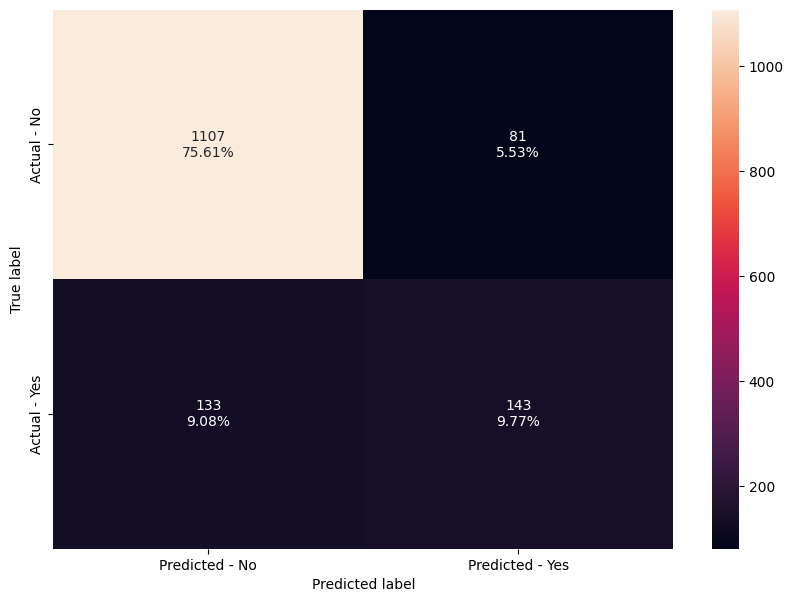

In [ ]:
#Calculating model accuracy
print('Tuned Training Accuracy:', d_tree_tuned.score(X_train, y_train))
print('Tuned Testing Accuracy:', d_tree_tuned.score(X_test, y_test))

#Creating confusion matrix
make_confusion_matrix(d_tree_tuned ,y_test)

### Insights
Notice that we have reduced the overfitting a small amount but we have not removed the issue all together. The most likely cause of this overfitting is the max_depth of our tree. Having a large max depth means that we are creating many rules to classify our data. If we reduce the depth of our tree we will likely reduce our overfitting. We can try that now.

In [ ]:
#Choose the type of classifier.
d_tree_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,5),
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring='accuracy', n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the decision tree to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

Tuned Training Accuracy: 0.8347978910369068
Tuned Testing Accuracy: 0.8333333333333334


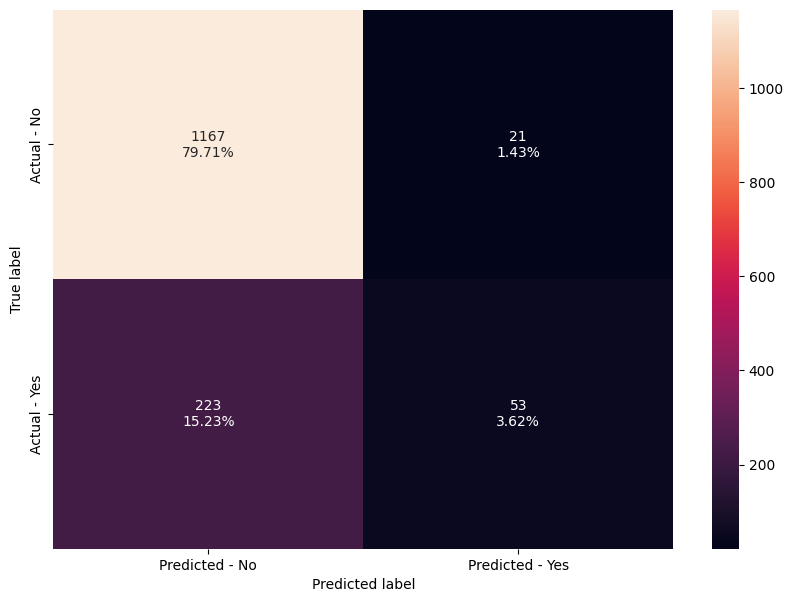

In [ ]:
#Calculating model accuracy
print('Tuned Training Accuracy:', d_tree_tuned.score(X_train, y_train))
print('Tuned Testing Accuracy:', d_tree_tuned.score(X_test, y_test))

#Creating confusion matrix
make_confusion_matrix(d_tree_tuned ,y_test)

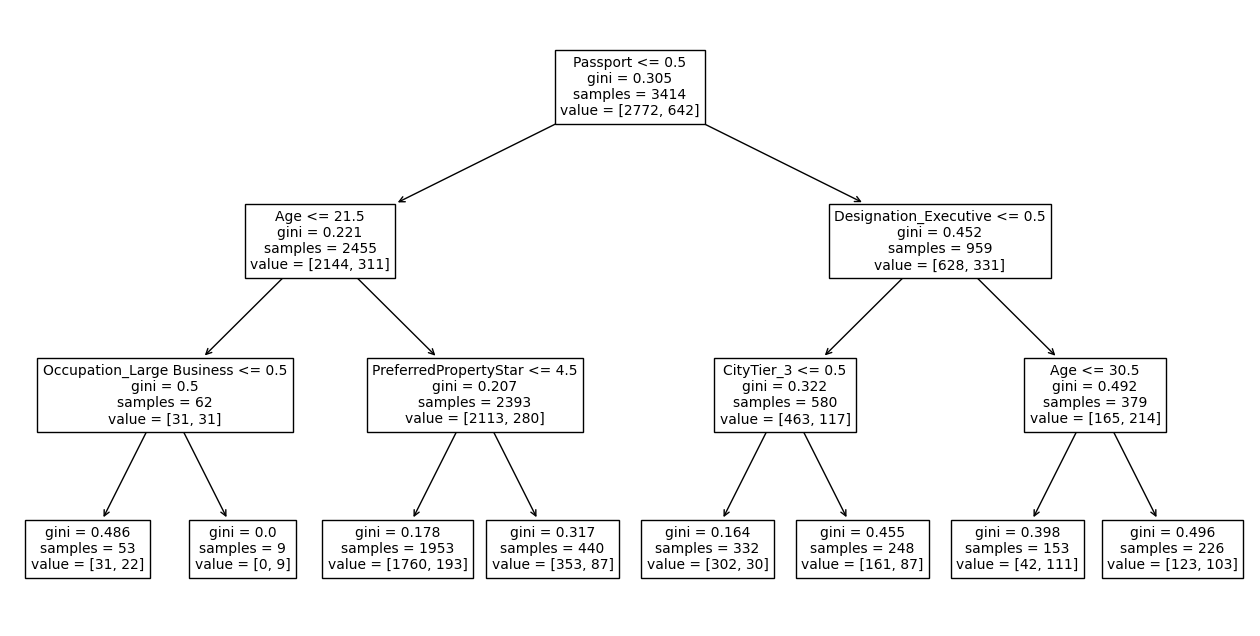

In [ ]:
plt.figure(figsize=(16,8))
tree.plot_tree(d_tree_tuned, fontsize=10, feature_names=X_train.columns)
plt.show()

### Insights
Notice that our new model does not overfit the training data anymore. The reason we are able to prevent the overfitting is because of how we have `tuned` the model with our new hyperparameters. Our testing performance has dropped a small amount, but this is an acceptable outcome because we now have confidence that our model will continue to perform at around 83% accuracy on any out-of-sample data that we have encounter in the future.

In [ ]:
importance = d_tree_tuned.feature_importances_
importance_df = pd.DataFrame(importance, index=X_train.columns, columns=["Importance"])
importance_df = importance_df[importance_df['Importance'] > 0]
importance_df.sort_values(by = 'Importance', ascending=False)

,Importance
Passport,0.348741
Designation_Executive,0.319874
Age,0.164255
CityTier_3,0.102024
PreferredPropertyStar,0.037218
Occupation_Large Business,0.027887


## 8. Compare results to the standard logistic regression

In [ ]:
logreg = LogisticRegression(random_state=123, fit_intercept=False, max_iter = 1000)
logreg.fit(X_train, y_train)

LogisticRegression(fit_intercept=False, max_iter=1000, random_state=123)

Training Accuracy: 0.8163444639718805
Testing Accuracy: 0.8210382513661202


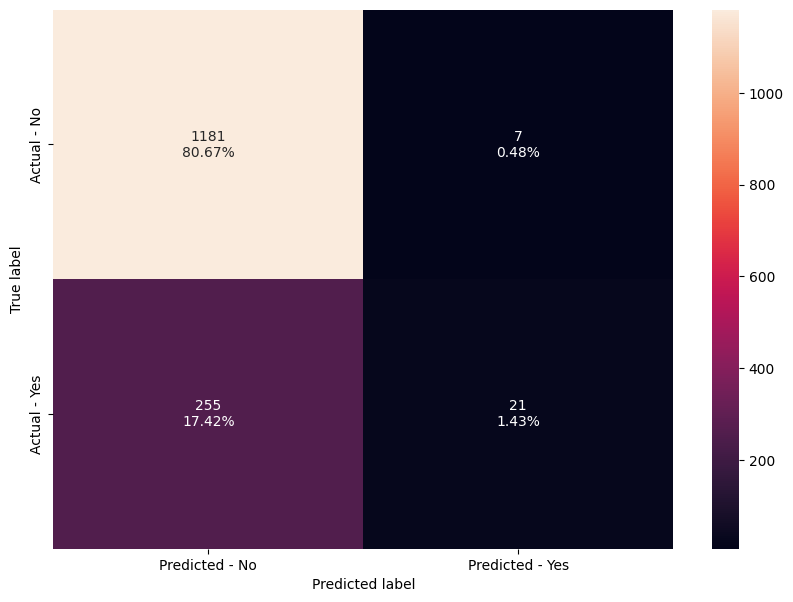

In [ ]:
#Calculating model accuracy
print('Training Accuracy:', logreg.score(X_train, y_train))
print('Testing Accuracy:', logreg.score(X_test, y_test))

#Creating confusion matrix
make_confusion_matrix(logreg,y_test)

## 9. Compare the performance of our 3 models

In [ ]:
# defining list of models
models = [d_tree, d_tree_tuned, logreg]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
over_fit = []

# looping through all the models to get the metrics score - Accuracy
for model in models:

    j_train = model.score(X_train, y_train)
    j_test = model.score(X_test, y_test)
    acc_train.append(j_train)
    acc_test.append(j_test)
    over_fit.append(abs(j_train - j_test))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree', 'Logistic Regression'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test, 'Overfit':over_fit})

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Accuracy',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Overfit
0,Decision Tree,1.000000,0.851093,0.148907
1,Tuned Decision Tree,0.834798,0.833333,0.001465
2,Logistic Regression,0.816344,0.821038,0.004694


## 10. Business Recommendations

From this analysis we are able to come to two conclusions. (1) The decision tree performs the best on this set of data with a test accuracy of 85%. (2) The tuned decision tree is likely the best choice of our models due to its relatively high test performance at 83% combined with its very low level of overfitting. This combination means that our model is likely going to continue to perform at this level on unseen data whereas the unfitted decision tree will likely have large variability in its performance on unseen data.

Based on the tuned decision tree, we are able to accuracy identify 83% of the customers that will purchase one of the new healthy travel packages.

## ASSIGNMENT WILL BE TO CONTINUE WORKING ON THE PRIOR DATASET FROM THE MACHINE LEARNING ASSIGNMENT IN FIN 6060 (LAST SEMESTER) AND TO COMPARE A LOGISITIC REGRESSION, A DECISION TREE, A TUNED DECISION TREE, AND A RANDOM FOREST (UNTUNED). YOU WILL NEED TO PUT IN SOME EFFORT TO LEARN ABOUT A RANDOM FOREST ON YOUR OWN, BUT CREATING THE CODE TO RUN ONE IS VERY SIMPLE. THAT ASSIGNMENT AND DATA IS LOCATED ON D2L IN THE SUBFOLDER CALLED FIN6060 MATERIAL WITHIN THIS COURSE SHELL.